In [0]:
'''
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)
                                           
# Mini-batch images and labels.
images, labels = next(iter(dataloader)) #data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass
    
# commont transform : 
transform = transforms.Compose([
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor(), 
        transforms.Normalize(mean = (.5,.5,.5), std = (.5,.5,.5))
        ])
        
#common image size : 

image_size = 224 #128,224,256

    
'''


'\n# You should build your custom dataset as below.\nclass CustomDataset(torch.utils.data.Dataset):\n    def __init__(self):\n        # TODO\n        # 1. Initialize file paths or a list of file names. \n        pass\n    def __getitem__(self, index):\n        # TODO\n        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).\n        # 2. Preprocess the data (e.g. torchvision.Transform).\n        # 3. Return a data pair (e.g. image and label).\n        pass\n    def __len__(self):\n        # You should change 0 to the total size of your dataset.\n        return 0 \n\n# You can then use the prebuilt data loader. \ncustom_dataset = CustomDataset()\ntrain_loader = torch.utils.data.DataLoader(dataset=custom_dataset,\n                                           batch_size=64, \n                                           shuffle=True)\n                                           \n# Mini-batch images and labels.\nimages, labels = next(iter(dataloader)) #data_iter.next()

In [0]:
##Opening Data And saving

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls '/content/drive/My Drive/University/04 Senior/3T/DeepLearningLabs/Lab2/data/'
myDrive = '/content/drive/My Drive/University/04 Senior/3T/DeepLearningLabs/Lab2/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cat.10000.jpg  hr-train.npy   mnist	   res-test.npy   vgg-train.npy
CatDog	       inc.pt	      model.ckpt   res-train.npy
hr.pt	       inc-test.npy   models.ckpt  vgg.pt
hr-test.npy    inc-train.npy  res.pt	   vgg-test.npy


In [0]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image


#Task use cat/dog dataseet, load the data and add additional transform -> Resize, totensor, normalize

class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for tensor, mean, std in zip(tensor, self.mean, self.std):
            tensor.mul_(std).add_(mean)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

In [0]:
#! Task 1, complete the catdog loader 

import os


default_directory = os.path.join(myDrive, 'CatDog/train')


class CatDog(torch.utils.data.Dataset):
    
    def __init__(self, transform, *, dataDir = default_directory):
        #Initialize the data and label list
        self.labels = []
        self.data = []
        
        #First load all images data
        listImage = os.listdir(dataDir)
        
        for x in listImage:
            #Second filter according name for labelling : cat : 1, dog : 0
            lbl = 1 if 'cat' in x else 0
            # Append to our class attribute :)
            path = os.path.join(dataDir, x)
            self.data.append(path)
            self.labels.append(lbl)
        
        
    def __getitem__(self, index):
        img = Image.open(self.data[index])
        img = transform(img)
        return img, self.labels[index]
    

    def __len__(self):
        return len(self.data)


# !Task 2, make three transforms in order : resize to (128,128), to tensor, normalize with mean and std = (.5,.5,.5)
tr = []  #
tr.append(T.Resize((128, 128)))
tr.append(T.ToTensor())
tr.append(T.Normalize(mean=[0.5, 0.5, 0.5], std=[.5, .5, .5]))
transform = T.Compose(tr)
UN = UnNormalize(mean=(.5,.5,.5),std=(.5,.5,.5))

#!Task 3, instantiate the dataset class and the loader
CatDogTrain =  CatDog(transform=transform)
train_loader = torch.utils.data.DataLoader(CatDogTrain, batch_size=16, shuffle=True, num_workers=1)

labels: 1


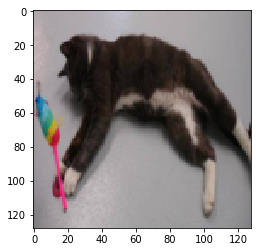

labels: 0


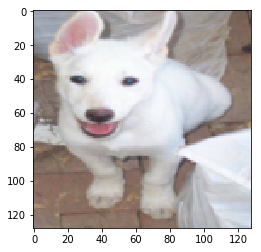

labels: 1


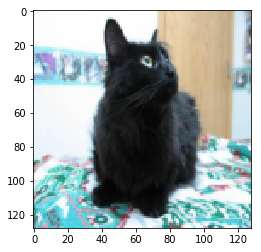

labels: 1


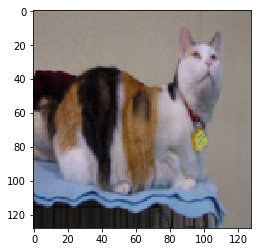

labels: 1


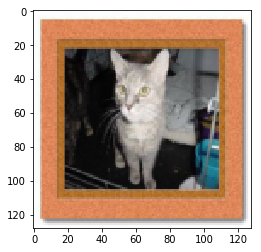

labels: 0


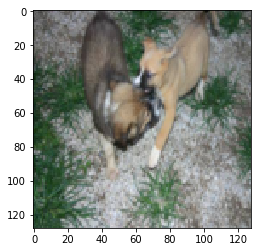

labels: 1


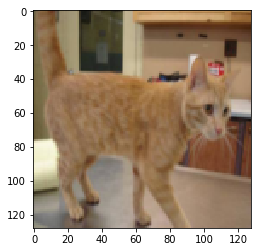

labels: 1


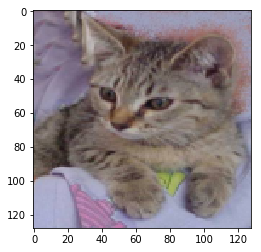

labels: 0


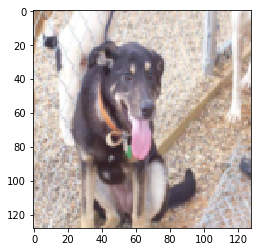

labels: 1


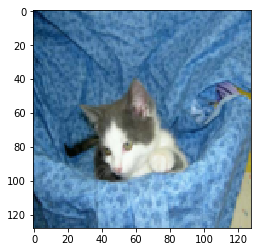

KeyboardInterrupt: ignored

In [0]:
#! Task 4, display the data Mini-batch images and labels.
for imgs, labels in train_loader:
    print(f'labels: {labels[0]}')
    plt.imshow((imgs[0].detach().cpu().permute(1,2,0).numpy()+1)/2)
    plt.show()